In [52]:
import importlib
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import surprise

import hw5_version
import surprise_version
importlib.reload(hw5_version)
importlib.reload(surprise_version)

%config InlineBackend.figure_format = 'retina'


In [5]:
Y_train = np.loadtxt('./data/train.txt').astype(int)
Y_test = np.loadtxt('./data/test.txt').astype(int)

M = max(max(Y_train[:,0]), max(Y_test[:,0])).astype(int) # users
N = max(max(Y_train[:,1]), max(Y_test[:,1])).astype(int) # movies


K = 20
eta = 0.03
reg = 0


Using the Homework 5 version of SVD 

In [46]:
U,V, err = hw5_version.train_model(M, N, K, eta, reg, Y_train)

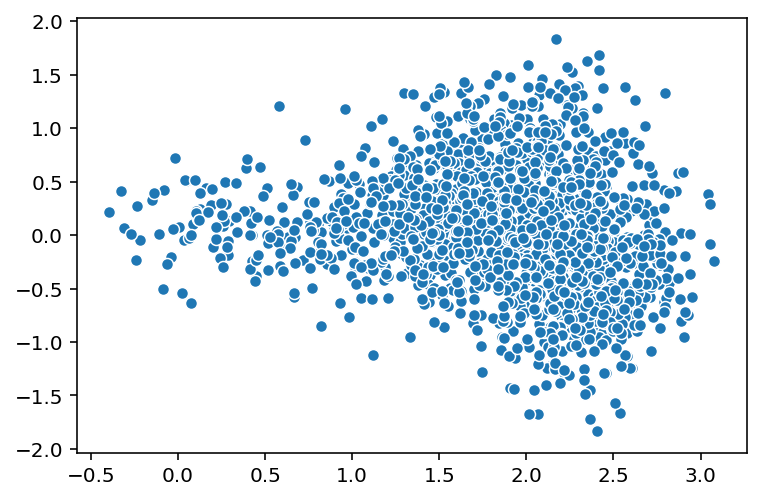

In [53]:
visualize_V(U,V)

In [51]:
print(err)
print(hw5_version.get_err(U,V,Y_test))

0.25411584641635193
0.6463891388921936


In [109]:
def visualize_V(U, V, labels=None, index=None, name='temp', save=False):
    A, s, B = np.linalg.svd(V.T)
    U_proj = A[:,0:2].T@U.T
    V_proj = A[:,0:2].T@V.T
    if index is None:
        plot = sns.scatterplot(V_proj[0,:],V_proj[1,:])
    else : 
        plot = sns.scatterplot(V_proj[0,index-1],V_proj[1,index-1])
        
    if not (labels is None):
        print('test')
        for i, label in enumerate(labels):
            plot.text(V_proj[0,index[i]-1],V_proj[1,index[i]-1]+0.05, label)
        
    if save:
        fig = plot.get_figure()
        fig.savefig(f'{name}.png')
        fig.savefig(f'{name}.pdf')
    
        
#     plt.scatter(V_proj[0,:],V_proj[1,:])

Using the off the shelf implementation of SVD.

In [48]:
model,  e_in_sur = surprise_version.train_model(M, N, K, eta, reg, Y_train)

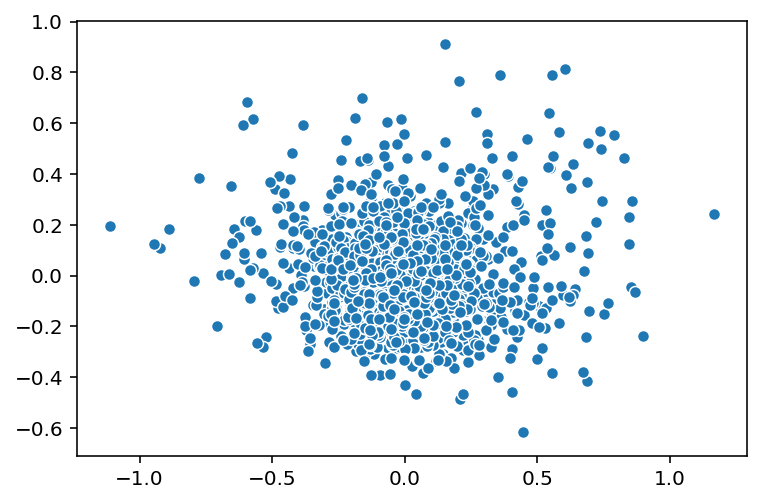

In [54]:
visualize_V(model.pu,model.qi)

In [50]:
print(e_in_sur)
print(surprise_version.get_err(model,Y_test))

0.7220634204154736
0.698022076064893


In [107]:
def multi_vis(U, V, name='temp'):
#     movies = np.genfromtxt('./data/movies.txt', dtype=None,delimiter='\t')
    df = pd.read_csv('./data/movies.txt',sep='\t',header=None)
    print(df.head())
    movies = df[1]
    
    # Ten Movies of our choice
    choice = np.arange(1,11)
    print(movies[choice])
    visualize_V(U,V,index=choice,name=f'{name}_choice',labels=movies[choice-1],save=True)
    
    # Ten Most Popular
    
    # Ten Best
    
    # Ten from each of three genres
    # Genre 1
    # Genre 2
    # Genre 3

   0                  1   2   3   4   5   6   7   8   9   ...  11  12  13  14  \
0   1   Toy Story (1995)   0   0   0   1   1   1   0   0  ...   0   0   0   0   
1   2   GoldenEye (1995)   0   1   1   0   0   0   0   0  ...   0   0   0   0   
2   3  Four Rooms (1995)   0   0   0   0   0   0   0   0  ...   0   0   0   0   
3   4  Get Shorty (1995)   0   1   0   0   0   1   0   0  ...   0   0   0   0   
4   5     Copycat (1995)   0   0   0   0   0   0   1   0  ...   0   0   0   0   

   15  16  17  18  19  20  
0   0   0   0   0   0   0  
1   0   0   0   1   0   0  
2   0   0   0   1   0   0  
3   0   0   0   0   0   0  
4   0   0   0   1   0   0  

[5 rows x 21 columns]
1                                      GoldenEye (1995)
2                                     Four Rooms (1995)
3                                     Get Shorty (1995)
4                                        Copycat (1995)
5     Shanghai Triad (Yao a yao yao dao waipo qiao) ...
6                                 Twelve M

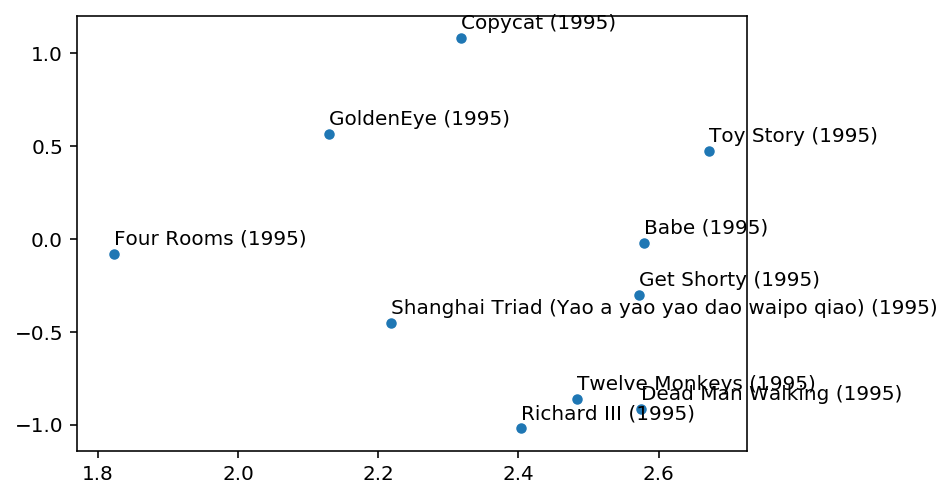

In [110]:
multi_vis(U,V)